## IIVP Practice Assignment Set-4

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

## Question 1

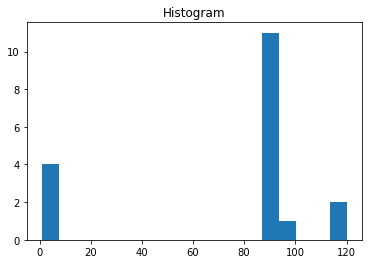

In [3]:
image = [
    [87, 90, 1],
    [1, 89, 89],
    [87, 120, 120],
    [88, 100, 90],
    [2, 88, 88],
    [2, 90, 90]
]

l = []

for i in image:
    for j in i:
        l.append(j)

plt.hist(l, bins=18)   
plt.title("Histogram")
plt.show()

## Question 2

### Contrast streaching

In [66]:
img = cv2.imread('images/lung.jpg', 0)

cv2.imshow('lung', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

img.shape

(2320, 2828)

In [67]:
a = 0
b = 255
c = np.min(img)
d = np.max(img)

new_img = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        new_img[i][j] = int((img[i][j] - c)*(b-a)/(d-c))


In [68]:
cv2.imshow('contrast streached lady', new_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('CS_lung.jpg', new_img)

True

### Histogram Equalisation

#### step 1: Frequency

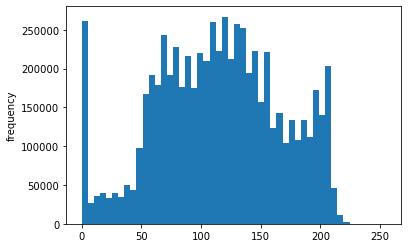

In [69]:
# new_img = np.copy(img)
flat = new_img.flatten()

plt.hist(flat, bins=50)
plt.ylabel("frequency")
plt.show()   

#### Step2 : Table

In [70]:
mapping = {}

for i in range(256):
    mapping[i] = 0
    

for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        mapping[new_img[i][j]] += 1
        
# calc pk/pixel_count and cumulative prob. 
# then multiplying it with lmax-1
# and finally rounding it off.

pixel_count = new_img.shape[0]*new_img.shape[1]

temp = {}
for i in range(256):
    temp[i] = 0

cum_sum = 0
for i,j in mapping.items():
    cum_sum += j/pixel_count
    temp[i] = int((cum_sum*255)+0.5)

    
# for i,j in temp.items():
#     print(i, j)

#### Step 3: new_image

In [71]:
HE_img = np.zeros((new_img.shape[0], new_img.shape[1]), dtype=np.uint8)

for i in range(new_img.shape[0]):
    for j in range(new_img.shape[1]):
        HE_img[i][j] = temp[new_img[i][j]]

In [72]:
cv2.imshow('Histogram Equalised lungs', HE_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

cv2.imwrite('HE_lung.jpg', HE_img)

True

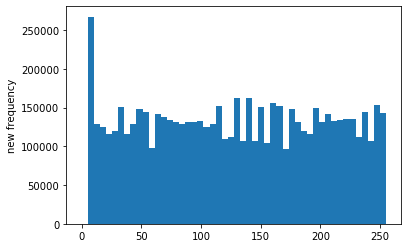

In [59]:
flat = HE_img.flatten()

plt.hist(flat, bins=50)
plt.ylabel("new frequency")
plt.show()  

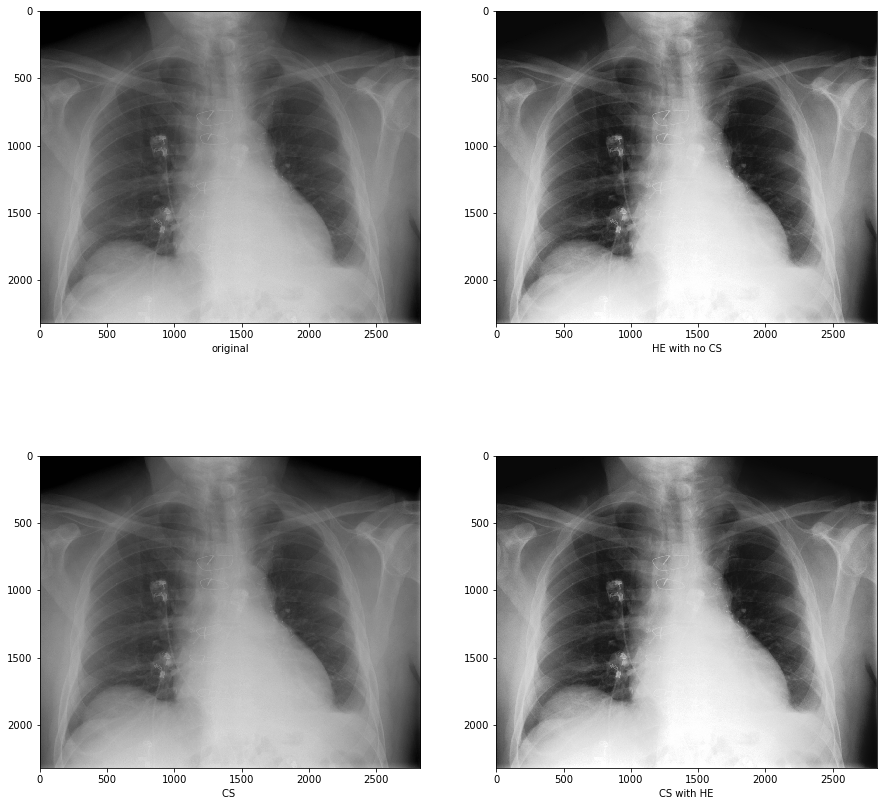

In [76]:
# set up side-by-side image display
fig = plt.figure()
fig.set_figheight(15)
fig.set_figwidth(15)

fig.add_subplot(2,2,1)
img1 = cv2.imread('images/lung.jpg', 0)
plt.imshow(img1, cmap='gray')
plt.xlabel('original')

# display the new image
fig.add_subplot(2,2,2)
img2 = cv2.imread('images/HE_lung_noCS.jpg', 0)
plt.imshow(img2, cmap='gray')
plt.xlabel('HE with no CS')

fig.add_subplot(2,2,3)
img3 = cv2.imread('images/CS_lung.jpg', 0)
plt.imshow(img3, cmap='gray')
plt.xlabel('CS ')

fig.add_subplot(2,2,4)
img4 = cv2.imread('images/HE_lung.jpg', 0)
plt.imshow(img4, cmap='gray')
plt.xlabel('CS with HE')

plt.show(block=True)